In [122]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
import pandas as pd

In [3]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianHQ/opendatasets/refs/heads/master/data/medical-charges.csv'

In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c1de48acd10>)

In [6]:
medical_df = pd.read_csv('medical.csv')

In [7]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '00000000'

# Correlation with age :

In [9]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [10]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal = 'box',
                   nbins=47,
                   title = 'Distribuition of Age')
# fig.update_layout(bargraph = 0.1)
fig.show()

1. The distribuition of age is uniform with 20 - 30 customers at every age.
2. The customers of age 18 and 19 are as double as other patients.

# Correlation with BMI

In [11]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal = 'box',
                   color_discrete_sequence=['red'],
                   title = 'Distribuition of BMI')
fig.show()

This seems to be a gaussian distribution centred at the age of 30.

# Charges :

This is the column we're trying to predict. Let us try figuring it out with the smoker and non-smoker persons.

In [12]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal = 'box',
                   color='smoker',
                   color_discrete_sequence=['green','grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

1. People who are smokers have more expenses than non-smokers.
2. For majority of the non smokers the annual expense is mostly less than $10k a year.

3. Median for a non smoker is 7,345 whereas for a smoker is $34,456

In [19]:
smoker_non_smoker = medical_df.copy()

In [29]:
smoker_non_smoker.describe()

,age,bmi,children,charges,smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000


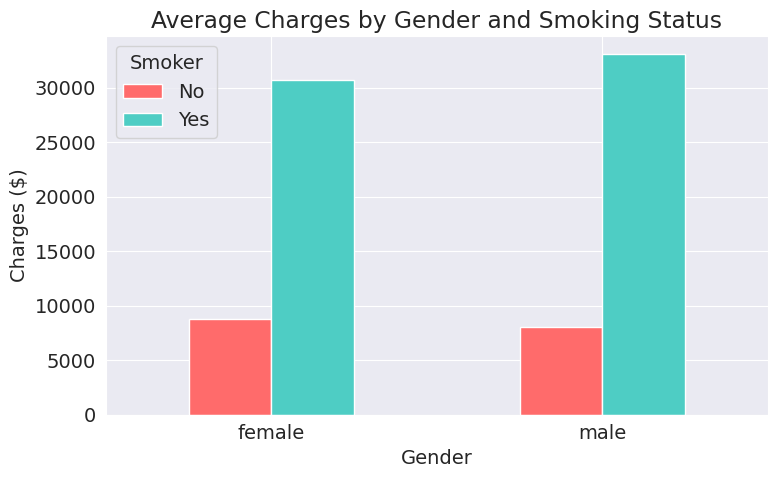

In [46]:
grouped_data = medical_df.groupby(['sex', 'smoker'])['charges'].mean().unstack()

# Plot
grouped_data.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], figsize=(8, 5))
plt.title('Average Charges by Gender and Smoking Status')
plt.xlabel('Gender')
plt.ylabel('Charges ($)')
plt.xticks(rotation=0)
plt.legend(title='Smoker', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

1. Males who smoke have relatively higher charges compared to females who smoke.
2. Females and Males who are non smokers have almost same charges.

In [45]:
fig = px.scatter(medical_df, x='age', y='charges', color='smoker',
                 title='Charges by Age and Smoking Status',
                 labels={'charges': 'Charges ($)', 'age': 'Age'},
                 color_discrete_map={'yes': '#FF6B6B', 'no': '#4ECDC4'})
fig.show()

# BMI vs Charges

In [47]:
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data = ['sex'],
                 title = 'BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

1. It appears that for smokers the increase in BMI leads to higher annual charges, which is not true for the non-smokers.

# Number of Children and Charges

In [48]:
px.violin(medical_df, x = 'children',y='charges')

# Correlation :

In [50]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [51]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [52]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [53]:
medical_df.charges.corr(smoker_non_smoker.smoker)

np.float64(0.787251430498478)

In [66]:
medical_df.smoker = np.where(medical_df.smoker == 'yes',1,0)

In [68]:
medical_df.sex = np.where(medical_df.sex == 'male',1,0)

In [69]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [71]:
medical_new_df = medical_df[['age','sex','bmi','smoker','charges','children']]

In [72]:
medical_new_df.corr()

,age,sex,bmi,smoker,charges,children
age,1.000000,-0.020856,0.109272,-0.025019,0.299008,0.042469
sex,-0.020856,1.000000,0.046371,0.076185,0.057292,0.017163
bmi,0.109272,0.046371,1.000000,0.003750,0.198341,0.012759
smoker,-0.025019,0.076185,0.003750,1.000000,0.787251,0.007673
charges,0.299008,0.057292,0.198341,0.787251,1.000000,0.067998
children,0.042469,0.017163,0.012759,0.007673,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

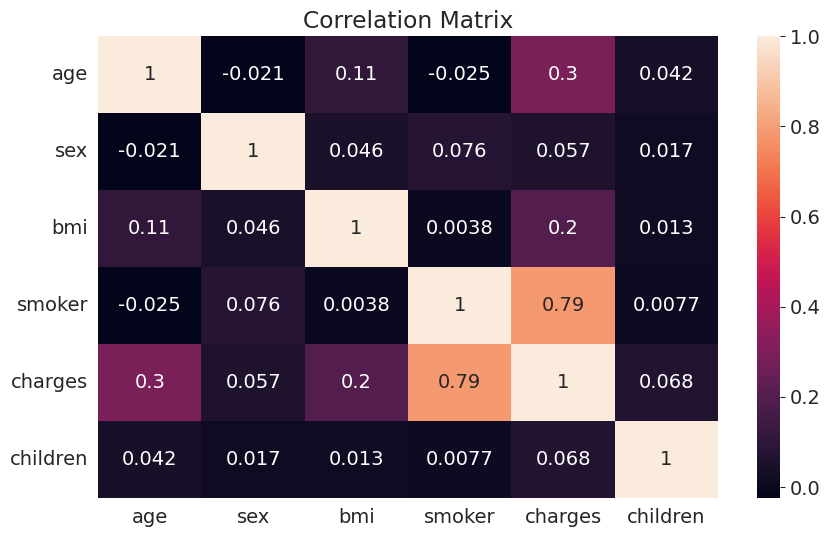

In [73]:
sns.heatmap(medical_new_df.corr(),annot=True)
plt.title('Correlation Matrix')

# Training Model On a Single Feature For Non-Smokers

In [101]:
def loss_function(targets,predicitions):
  return np.sqrt(np.mean(np.square(targets-predicitions)))

In [76]:
non_smoker_df = medical_new_df[medical_new_df.smoker == 0]

In [105]:
inputs = non_smoker_df[['age','bmi','children','smoker']]
target = non_smoker_df['charges']

# One hot encoding

<Axes: xlabel='region', ylabel='charges'>

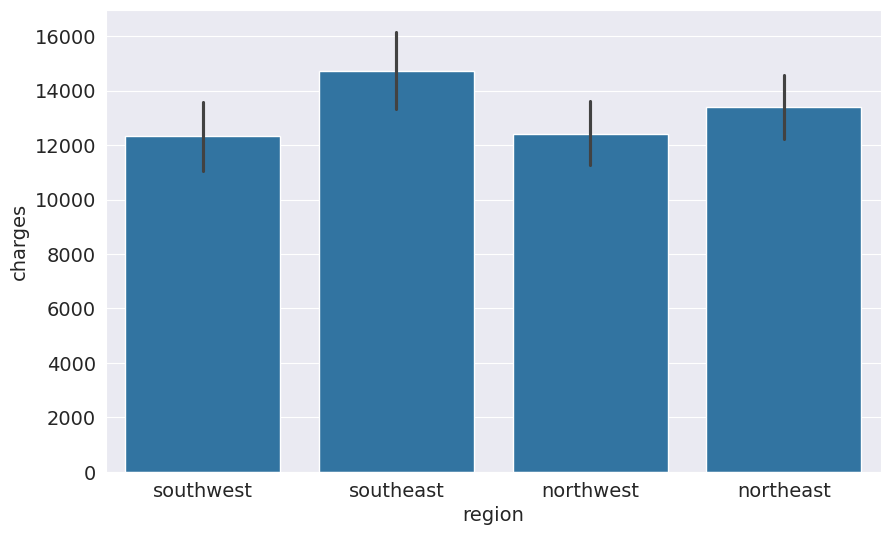

In [112]:
sns.barplot(data = medical_df,x='region',y='charges')

In [114]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [115]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [118]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot

# Feature Scaling

In [123]:
numeric_cols = ['age','bmi','children']

scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [129]:
cat_cols = ['smoker','sex','northeast','northwest','southeast','southwest']
categorical_data = medical_df[cat_cols].values

In [130]:
medical_df[numeric_cols] = scaler.transform(medical_df[numeric_cols])

In [131]:
inputs = np.concatenate((scaled_inputs,categorical_data),axis = 1)
targets = medical_df.charges

#creating and training the model :
model = LinearRegression().fit(inputs,targets)

#Generate predictions :
predictions = model.predict(inputs)

#Compute loss to evaluate the model :
loss = loss_function(targets,predictions)
print(f'Loss : {loss}')

Loss : 6041.6796511744515
